In [1]:
!pwd

/Users/yuanshi/Library/CloudStorage/Box-Box/Sequence Analysis/2025/D1D2_organize/script_DNA


In [2]:
import pickle
import pandas as pd
from statannotations.Annotator import Annotator
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Analyze BC and IS
1. on the sample level
2. on the barcode level (IS/BC)
3. on the IS level (UMI/IS)

In [3]:
with open('../picklefiles/fdata.pkl','rb') as f:
    data = pickle.load(f)

In [4]:
summary = pd.read_csv('../csvfiles/summary_lite.csv')
perIS = pd.read_csv('../csvfiles/perIS_lite.csv')
perBC = pd.read_csv('../csvfiles/perBC_lite.csv')

treatment_order = ['No NK', 'GFP-NK', 'D1D2-NK']
summary['Treatment'] = pd.Categorical(summary['Treatment'], categories=treatment_order, ordered=True)

In [5]:
perBC

,SampleID,Mouse_Cohort,MouseID,AnimalID,Organ,Treatment,barcode,UMI,site,Transcription_Organ,Transcription_Animal,Viremia
0,JCMMG32-#23-BM,JCMMG32,#23,JCMMG32-#23,BM,GFP-NK,GGCAGCTCCGGCGACGTCGAC,1,1,False,False,False
1,JCMMG32-#23-BM,JCMMG32,#23,JCMMG32-#23,BM,GFP-NK,GTCATCAACTTCCACGTCTTC,1,1,False,False,False
2,JCMMG32-#23-BM,JCMMG32,#23,JCMMG32-#23,BM,GFP-NK,GTCCGCTACGTCGACTTCTAC,1,1,False,False,False
3,JCMMG32-#23-BM,JCMMG32,#23,JCMMG32-#23,BM,GFP-NK,GTCCGCTTCGGCGACTTCGAC,1,1,False,False,False
4,JCMMG32-#23-BM,JCMMG32,#23,JCMMG32-#23,BM,GFP-NK,GTCCTCGACGGCGGCGTCGAC,1,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1054,JMGA36-#9-SP,JMGA36,#9,JMGA36-#9,SP,GFP-NK,CACTACTCATCTACTCCACC,78,2,False,False,False
1055,JMGA36-#9-SP,JMGA36,#9,JMGA36-#9,SP,GFP-NK,CGCACCAGCCGCTACATCGAC,1,1,False,False,False
1056,JMGA36-#9-SP,JMGA36,#9,JMGA36-#9,SP,GFP-NK,TACACCATCCACTACGTCGCC,1,1,False,False,False
1057,JMGA36-#9-SP,JMGA36,#9,JMGA36-#9,SP,GFP-NK,TGCTCCAACCTCCGCCCC,1,1,False,False,False


In [6]:
BC = perBC.groupby('SampleID').count()[['barcode']].reset_index()
IS = perIS.groupby('SampleID').count()[['site']].reset_index()

In [7]:
summary = pd.merge(summary,BC,left_on='SampleID',right_on='SampleID')
summary = pd.merge(summary,IS,left_on='SampleID',right_on='SampleID')

In [8]:
summary

,SampleID,Mouse_Cohort,MouseID,Organ,Treatment,Depth,HIV fraction,hg38 fraction,plasmid fraction,unintegrated fraction,HIV_UMI_count,hg38_UMI_count,plasmid_UMI_count,unintegrated_UMI_count,AnimalID,barcode,site
0,JCMMG32-#44-LIV,JCMMG32,#44,LIV,D1D2-NK,209192,0.000364,0.023251,0.000000,0.976384,2,301,0,0,JCMMG32-#44,1,1
1,JCMMG32-#44-SP,JCMMG32,#44,SP,D1D2-NK,777659,0.000687,0.015803,0.000280,0.983229,41,1250,0,0,JCMMG32-#44,11,58
2,JCMMG32-#44-BM,JCMMG32,#44,BM,D1D2-NK,2820269,0.002521,0.028942,0.002393,0.966144,434,5835,0,0,JCMMG32-#44,48,85
3,JCMMG32-#58-SP,JCMMG32,#58,SP,D1D2-NK,1709173,0.004678,0.008498,0.000131,0.986692,668,1083,0,0,JCMMG32-#58,23,69
4,JCMMG32-#58-LIV,JCMMG32,#58,LIV,D1D2-NK,41991,0.003332,0.006910,0.000070,0.989688,4,42,0,0,JCMMG32-#58,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,JMGA36-#6-SP,JMGA36,#6,SP,No NK,289363,0.001132,0.021018,0.000000,0.977850,34,503,0,0,JMGA36-#6,4,9
94,JMGA36-#6-LIV,JMGA36,#6,LIV,No NK,407225,0.011635,0.055448,0.000268,0.932649,112,574,0,0,JMGA36-#6,1,28
95,JMGA36-#8-BM,JMGA36,#8,BM,No NK,286031,0.002029,0.018500,0.000164,0.979306,24,469,0,0,JMGA36-#8,6,40
96,JMGA36-#8-SP,JMGA36,#8,SP,No NK,395308,0.000498,0.024244,0.000008,0.975250,21,744,0,0,JMGA36-#8,7,12


## total BC

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No NK vs. GFP-NK: Mann-Whitney-Wilcoxon test two-sided, P_val:1.179e-01 U_stat=5.195e+02
GFP-NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test two-sided, P_val:7.916e-03 U_stat=5.800e+02
No NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test two-sided, P_val:1.500e-01 U_stat=6.045e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No NK vs. GFP-NK: Mann-Whitney-Wilcoxon test greater, P_val:9.423e-01 U_stat=5.195e+02
GFP-NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test greater, P_val:3.958e-03 U_stat=5.800e+02
No NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test greater, P_val:7.500e-02 U_stat=6.045e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 <

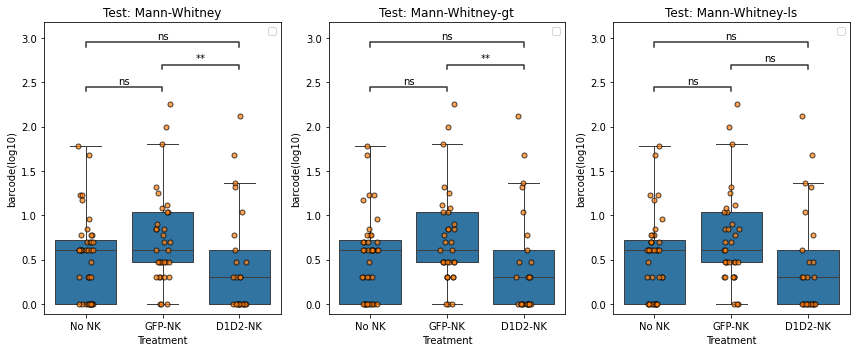

In [9]:
fig,axes = plt.subplots(1,3,figsize=[12,5])
axes = axes.flatten()

pairs = [
    (('No NK'), ('GFP-NK')),
    (('No NK'), ('D1D2-NK')),
    (('GFP-NK'), ('D1D2-NK'))]

tests = ['Mann-Whitney','Mann-Whitney-gt','Mann-Whitney-ls']

category_order = ['No NK', 'GFP-NK', 'D1D2-NK']

summary['barcode(log10)'] = np.log10(summary['barcode'])

for i,ax in enumerate(axes):
    sns.boxplot(x=summary['Treatment'],y=summary['barcode(log10)'],showfliers=False,ax=ax,order = category_order)
    sns.stripplot(x=summary['Treatment'],y=summary['barcode(log10)'],order = category_order,
                size=5,                 # Increase dot size
                edgecolor='black',      # Add black edge to dots
                linewidth=1,            # Edge thickness
                alpha=0.7,          # Slight transparency
                ax=ax  )
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:4], labels[:4])
    annotator = Annotator(ax, pairs, data=summary, x='Treatment', y='barcode(log10)', order=['No NK', 'GFP-NK','D1D2-NK'])
    annotator.configure(test=tests[i], text_format='star', loc='inside')
    annotator.apply_and_annotate()
    ax.set_title('Test: {}'.format(tests[i]))

plt.tight_layout()
plt.savefig('../figures/totalBC.png',dpi=300)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No NK vs. GFP-NK: Mann-Whitney-Wilcoxon test two-sided, P_val:1.868e-01 U_stat=5.405e+02
GFP-NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test two-sided, P_val:5.716e-01 U_stat=4.490e+02
No NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test two-sided, P_val:7.003e-01 U_stat=4.710e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No NK vs. GFP-NK: Mann-Whitney-Wilcoxon test greater, P_val:9.084e-01 U_stat=5.405e+02
GFP-NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test greater, P_val:2.858e-01 U_stat=4.490e+02
No NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test greater, P_val:6.548e-01 U_stat=4.710e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 <

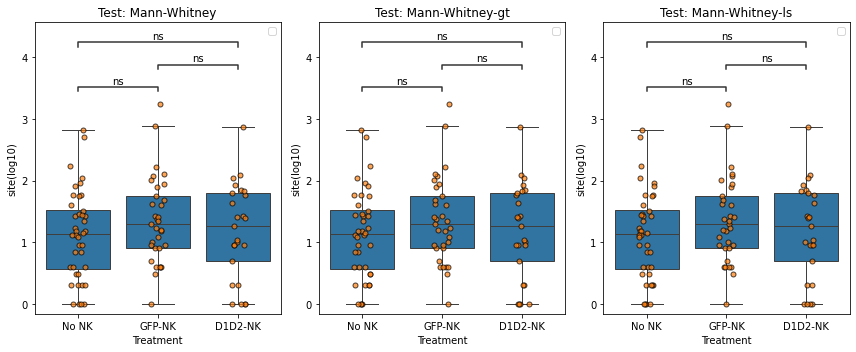

In [10]:
fig,axes = plt.subplots(1,3,figsize=[12,5])
axes = axes.flatten()

pairs = [
    (('No NK'), ('GFP-NK')),
    (('No NK'), ('D1D2-NK')),
    (('GFP-NK'), ('D1D2-NK'))]

tests = ['Mann-Whitney','Mann-Whitney-gt','Mann-Whitney-ls']

category_order = ['No NK', 'GFP-NK', 'D1D2-NK']

summary['site(log10)'] = np.log10(summary['site'])


for i,ax in enumerate(axes):
    sns.boxplot(x=summary['Treatment'],y=summary['site(log10)'],showfliers=False,ax=ax,order = category_order)
    sns.stripplot(x=summary['Treatment'],y=summary['site(log10)'],order = category_order,
                size=5,                 # Increase dot size
                edgecolor='black',      # Add black edge to dots
                linewidth=1,            # Edge thickness
                alpha=0.7,          # Slight transparency
                ax=ax  )
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:4], labels[:4])
    annotator = Annotator(ax, pairs, data=summary, x='Treatment', y='site(log10)', order=['No NK', 'GFP-NK','D1D2-NK'])
    annotator.configure(test=tests[i], text_format='star', loc='inside')
    annotator.apply_and_annotate()
    ax.set_title('Test: {}'.format(tests[i]))

plt.tight_layout()
plt.savefig('../figures/totalIS.png',dpi=300)

## Overlapping

In [11]:
Jaccard_IS = []
AnimalIDs = list(summary['AnimalID'].unique())
def find_data(animal,organ,df):
    mask1 = df['AnimalID'] == animal
    mask2 = df['Organ'] == organ
    return df[mask1 & mask2]

def get_Jaccard_index(data1,data2):
    overlap = set(data1['site']) & set(data2['site'])
    return np.sum(data1[data1['site'].isin(overlap)]['UMI'])/np.sum(data1['UMI'])
    
for animal in AnimalIDs:
    organs = perIS[perIS['AnimalID']==animal]['Organ'].unique()
    for donor_organ in organs:
        for acceptor_organ in organs:
            if donor_organ == acceptor_organ:
                continue
            data1 = find_data(animal,donor_organ,perIS)
            data2 = find_data(animal,acceptor_organ,perIS)
            Jaccard_IS.append({'organ1':donor_organ,'organ2':acceptor_organ,'animal':animal,'Jaccard':get_Jaccard_index(data1,data2)})
Jaccard_IS = pd.DataFrame(Jaccard_IS)
Jaccard_IS = pd.merge(summary,Jaccard_IS,left_on = 'AnimalID',right_on = 'animal')[['Treatment','AnimalID','organ1','organ2','Jaccard']].drop_duplicates()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No NK vs. GFP-NK: Mann-Whitney-Wilcoxon test two-sided, P_val:3.125e-01 U_stat=2.130e+03
GFP-NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test two-sided, P_val:8.639e-05 U_stat=1.774e+03
No NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test two-sided, P_val:3.620e-03 U_stat=1.968e+03
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No NK vs. GFP-NK: Mann-Whitney-Wilcoxon test greater, P_val:8.448e-01 U_stat=2.130e+03
GFP-NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test greater, P_val:4.320e-05 U_stat=1.774e+03
No NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test greater, P_val:1.810e-03 U_stat=1.968e+03
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 <

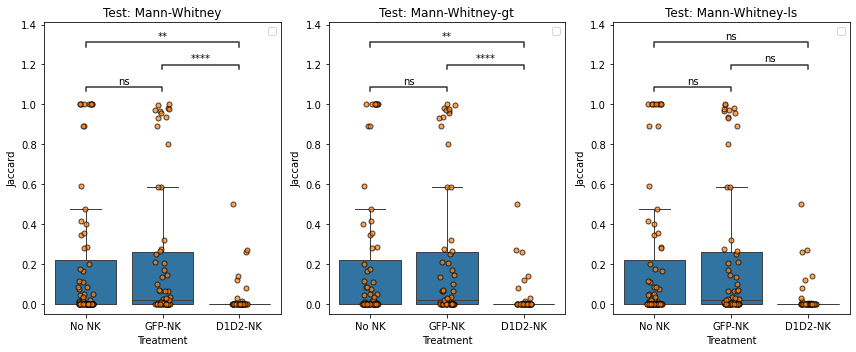

In [12]:
fig,axes = plt.subplots(1,3,figsize=[12,5])
axes = axes.flatten()

pairs = [
    (('No NK'), ('GFP-NK')),
    (('No NK'), ('D1D2-NK')),
    (('GFP-NK'), ('D1D2-NK'))]

tests = ['Mann-Whitney','Mann-Whitney-gt','Mann-Whitney-ls']
category_order = ['No NK', 'GFP-NK', 'D1D2-NK']
for i,ax in enumerate(axes):
    sns.boxplot(x=Jaccard_IS['Treatment'],y=Jaccard_IS['Jaccard'],showfliers=False,order = category_order,ax=ax)
    sns.stripplot(x=Jaccard_IS['Treatment'],y=Jaccard_IS['Jaccard'],order = category_order,
                size=5,                 # Increase dot size
                edgecolor='black',      # Add black edge to dots
                linewidth=1,            # Edge thickness
                alpha=0.7,          # Slight transparency
                ax=ax  )
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:4], labels[:4])

    annotator = Annotator(ax, pairs, data=Jaccard_IS, x='Treatment', y='Jaccard', order=['No NK', 'GFP-NK','D1D2-NK'])
    annotator.configure(test=tests[i], text_format='star', loc='inside')
    annotator.apply_and_annotate()
    ax.set_title('Test: {}'.format(tests[i]))
plt.tight_layout()
plt.savefig('../figures/overlappingIS.png',dpi=300)

Conclusion:
No-NK ~= GFP-NK > D1D2-NK

D1D2-NK treatment provirus are more clonal and isolated.

## Proliferation Index (UMI/IS)

/opt/anaconda3/envs/new/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No NK vs. GFP-NK: Mann-Whitney-Wilcoxon test two-sided, P_val:8.575e-01 U_stat=3.876e+06
GFP-NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test two-sided, P_val:7.141e-25 U_stat=2.375e+06
No NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test two-sided, P_val:1.159e-20 U_stat=1.419e+06
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No NK vs. GFP-NK: Mann-Whitney-Wilcoxon test greater, P_val:5.712e-01 U_stat=3.876e+06
GFP-NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test greater, P_val:1.000e+00 U_stat=2.375e+06
No NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test greater, P_val:1.000e+00 U_stat=1.419e+06
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 <

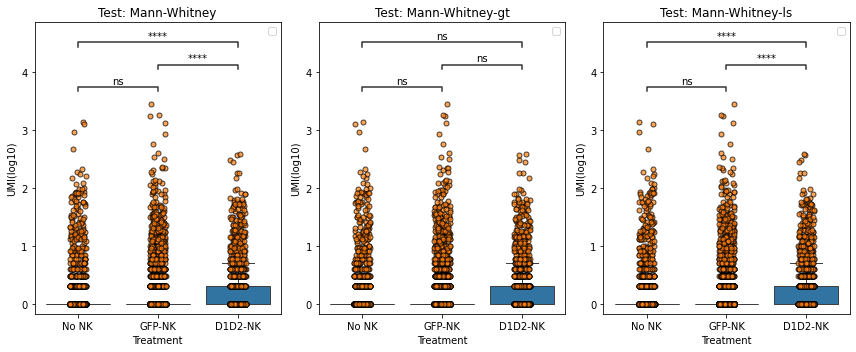

In [13]:
fig,axes = plt.subplots(1,3,figsize=[12,5])
axes = axes.flatten()

df = perIS.copy()
df['UMI(log10)'] = np.log10(df['UMI'])

pairs = [
    (('No NK'), ('GFP-NK')),
    (('No NK'), ('D1D2-NK')),
    (('GFP-NK'), ('D1D2-NK'))]

tests = ['Mann-Whitney','Mann-Whitney-gt','Mann-Whitney-ls']
category_order = ['No NK', 'GFP-NK', 'D1D2-NK']

for i,ax in enumerate(axes):
    sns.boxplot(x=df['Treatment'],y=df['UMI(log10)'],showfliers=False,ax=ax,order = category_order)
    sns.stripplot(x=df['Treatment'],y=df['UMI(log10)'],order = category_order,
                size=5,                 # Increase dot size
                edgecolor='black',      # Add black edge to dots
                linewidth=1,            # Edge thickness
                alpha=0.7,          # Slight transparency
                ax=ax  )
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:4], labels[:4])

    annotator = Annotator(ax, pairs, data=df, x='Treatment', y='UMI(log10)', order=['No NK', 'GFP-NK','D1D2-NK'])
    annotator.configure(test=tests[i], text_format='star', loc='inside')
    annotator.apply_and_annotate()
    ax.set_title('Test: {}'.format(tests[i]))
plt.tight_layout()
plt.savefig('../figures/proliferation_total.png',dpi=300)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No NK vs. GFP-NK: Mann-Whitney-Wilcoxon test two-sided, P_val:2.593e-19 U_stat=8.546e+05
GFP-NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test two-sided, P_val:3.826e-11 U_stat=9.954e+05
No NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test two-sided, P_val:1.409e-02 U_stat=2.249e+05
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No NK vs. GFP-NK: Mann-Whitney-Wilcoxon test greater, P_val:1.297e-19 U_stat=8.546e+05
GFP-NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test greater, P_val:1.000e+00 U_stat=9.954e+05
No NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test greater, P_val:7.047e-03 U_stat=2.249e+05
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 <

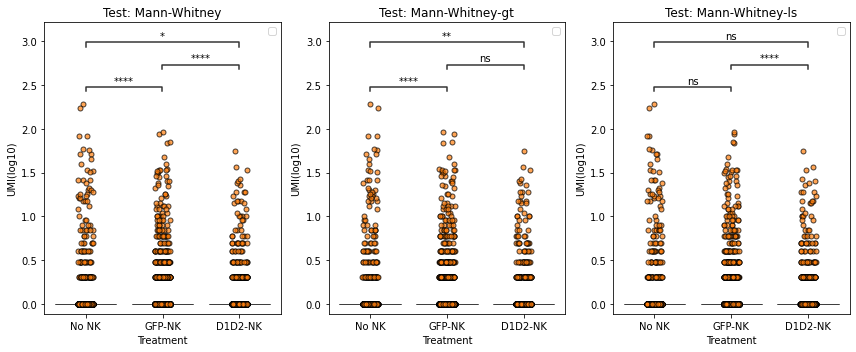

In [14]:
fig,axes = plt.subplots(1,3,figsize=[12,5])
axes = axes.flatten()

df = perIS[perIS['Viremia']].copy()
df['UMI(log10)'] = np.log10(df['UMI'])

pairs = [
    (('No NK'), ('GFP-NK')),
    (('No NK'), ('D1D2-NK')),
    (('GFP-NK'), ('D1D2-NK'))]

tests = ['Mann-Whitney','Mann-Whitney-gt','Mann-Whitney-ls']
category_order = ['No NK', 'GFP-NK', 'D1D2-NK']

for i,ax in enumerate(axes):
    sns.boxplot(x=df['Treatment'],y=df['UMI(log10)'],showfliers=False,ax=ax,order = category_order)
    sns.stripplot(x=df['Treatment'],y=df['UMI(log10)'],order = category_order,
                size=5,                 # Increase dot size
                edgecolor='black',      # Add black edge to dots
                linewidth=1,            # Edge thickness
                alpha=0.7,          # Slight transparency
                ax=ax  )
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:4], labels[:4])

    annotator = Annotator(ax, pairs, data=df, x='Treatment', y='UMI(log10)', order=['No NK', 'GFP-NK','D1D2-NK'])
    annotator.configure(test=tests[i], text_format='star', loc='inside')
    annotator.apply_and_annotate()
    ax.set_title('Test: {}'.format(tests[i]))
plt.tight_layout()
plt.savefig('../figures/proliferation_viremia.png',dpi=300)

conclusion:
total UMI/IS, D1D2-NK > GFP-NK ~= No-NK
viremia UMI/IS, No-NK > D1D-NK > GFP-NK

Overall D1D2-NK treatment provirus shows a higher proliferation score, but this could be from the selection (related to a more clonal phenotype). 

Currently the UMI/IS was calculated within each organ sample, change here to calculate from the animal level
For example, if IS1 has an UMI = 1 in organ1 of animal1, and UMI=3 in organ2 of that same animal, it was counted as (1,3). At the animal level, it should be (4). On the other hand, if IS2 has an UMI = 4 in organ1 of animal, and UMI = 0 in organ2 of animal. At organ level, UMI/IS for animal1 vs animal2 is (1,3) vs (4,0); while at animal level, it is (4) vs (4).

How about compare at animal level?

## Reseeding (IS/BC)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No NK vs. GFP-NK: Mann-Whitney-Wilcoxon test two-sided, P_val:9.685e-08 U_stat=8.273e+04
GFP-NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test two-sided, P_val:1.567e-05 U_stat=5.992e+04
No NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test two-sided, P_val:3.530e-01 U_stat=3.847e+04
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No NK vs. GFP-NK: Mann-Whitney-Wilcoxon test greater, P_val:4.843e-08 U_stat=8.273e+04
GFP-NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test greater, P_val:1.000e+00 U_stat=5.992e+04
No NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test greater, P_val:1.765e-01 U_stat=3.847e+04
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 <

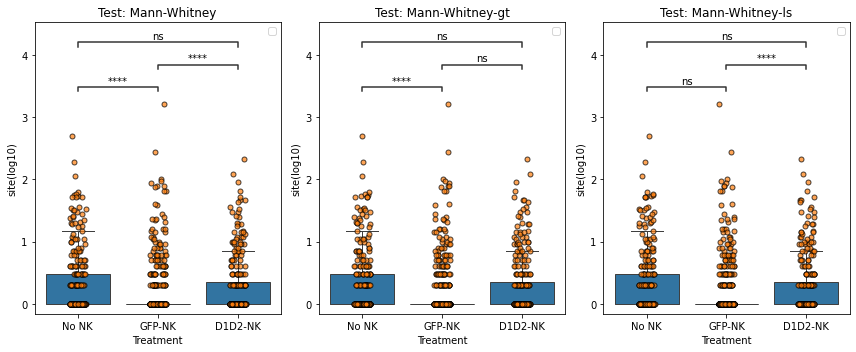

In [15]:
fig,axes = plt.subplots(1,3,figsize=[12,5])
axes = axes.flatten()

df = perBC.copy()
df['site(log10)'] = np.log10(df['site'])

pairs = [
    (('No NK'), ('GFP-NK')),
    (('No NK'), ('D1D2-NK')),
    (('GFP-NK'), ('D1D2-NK'))]

tests = ['Mann-Whitney','Mann-Whitney-gt','Mann-Whitney-ls']
category_order = ['No NK', 'GFP-NK', 'D1D2-NK']

for i,ax in enumerate(axes):
    sns.boxplot(x=df['Treatment'],y=df['site(log10)'],showfliers=False,ax=ax,order = category_order)
    sns.stripplot(x=df['Treatment'],y=df['site(log10)'],order = category_order,
                size=5,                 # Increase dot size
                edgecolor='black',      # Add black edge to dots
                linewidth=1,            # Edge thickness
                alpha=0.7,          # Slight transparency
                ax=ax  )
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:4], labels[:4])

    annotator = Annotator(ax, pairs, data=df, x='Treatment', y='site(log10)', order=['No NK', 'GFP-NK','D1D2-NK'])
    annotator.configure(test=tests[i], text_format='star', loc='inside')
    annotator.apply_and_annotate()
    ax.set_title('Test: {}'.format(tests[i]))
plt.tight_layout()
plt.savefig('../figures/reseeding_all.png',dpi=300)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No NK vs. GFP-NK: Mann-Whitney-Wilcoxon test two-sided, P_val:1.525e-01 U_stat=2.142e+03
GFP-NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test two-sided, P_val:1.937e-02 U_stat=6.835e+02
No NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test two-sided, P_val:2.066e-04 U_stat=5.195e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No NK vs. GFP-NK: Mann-Whitney-Wilcoxon test greater, P_val:9.243e-01 U_stat=2.142e+03
GFP-NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test greater, P_val:9.905e-01 U_stat=6.835e+02
No NK vs. D1D2-NK: Mann-Whitney-Wilcoxon test greater, P_val:9.999e-01 U_stat=5.195e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 <

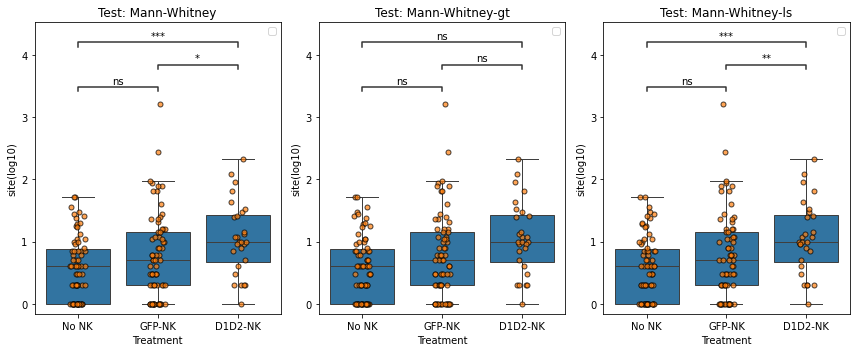

In [16]:
fig,axes = plt.subplots(1,3,figsize=[12,5])
axes = axes.flatten()

df = perBC[perBC['Viremia']].copy()
df['site(log10)'] = np.log10(df['site'])

pairs = [
    (('No NK'), ('GFP-NK')),
    (('No NK'), ('D1D2-NK')),
    (('GFP-NK'), ('D1D2-NK'))]

tests = ['Mann-Whitney','Mann-Whitney-gt','Mann-Whitney-ls']
category_order = ['No NK', 'GFP-NK', 'D1D2-NK']

for i,ax in enumerate(axes):
    sns.boxplot(x=df['Treatment'],y=df['site(log10)'],showfliers=False,ax=ax,order = category_order)
    sns.stripplot(x=df['Treatment'],y=df['site(log10)'],order = category_order,
                size=5,                 # Increase dot size
                edgecolor='black',      # Add black edge to dots
                linewidth=1,            # Edge thickness
                alpha=0.7,          # Slight transparency
                ax=ax  )
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:4], labels[:4])

    annotator = Annotator(ax, pairs, data=df, x='Treatment', y='site(log10)', order=['No NK', 'GFP-NK','D1D2-NK'])
    annotator.configure(test=tests[i], text_format='star', loc='inside')
    annotator.apply_and_annotate()
    ax.set_title('Test: {}'.format(tests[i]))
plt.tight_layout()
plt.savefig('../figures/reseeding_viremia.png',dpi=300)

Conclusion:
total IS/BC, No-NK > GFP-NK ~= D1D2-NK
viremia IS/BC, D1D2-NK > GFP-NK ~= No-NK

Conclusion of the animal level perBC:
total IS/BC, No-NK ~ GFP-NK > D1D2-NK
viremia IS/BC, not significant